# Classifying CIFAR-10 dataset with the help of Convolutional Neural Networks (CNN):

<b>Import required libraries<b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<b>Import CIFAR-10 dataset

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 32s 0us/step


<b>Checking shape of training and testing data<b>

In [4]:
print('Shape of Dataset: ')
print(X_train.shape,'\t',X_test.shape,'\t',y_train.shape,'\t',y_test.shape)

Shape of Dataset: 
(50000, 32, 32, 3) 	 (10000, 32, 32, 3) 	 (50000, 1) 	 (10000, 1)


<b>Display some sample images of the dataset<b>

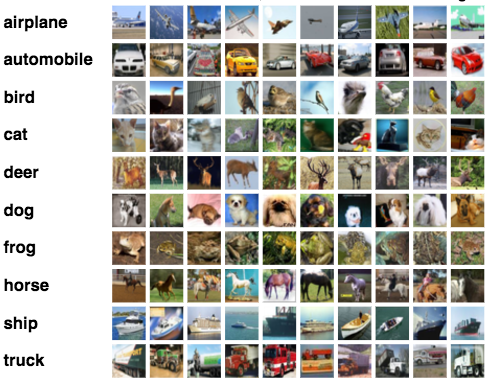

In [25]:
from PIL import Image
Image.open('cifar-10.png')

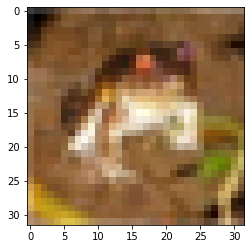

In [8]:
plt.imshow(X_train[0])

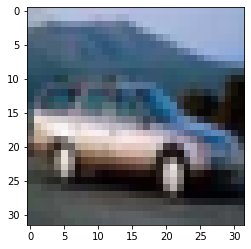

In [9]:
plt.imshow(X_train[4])

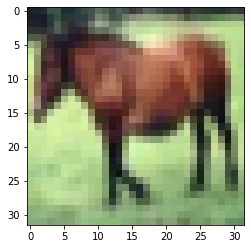

In [10]:
plt.imshow(X_train[7])

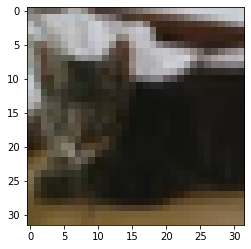

In [12]:
plt.imshow(X_train[9])

<b>Checking max and min size and scaling the dataset<b>

In [13]:
X_train.max()

255

In [14]:
X_train.min()

0

In [15]:
X_train = X_train/255
X_test = X_test/255

In [19]:
y_train[0:11]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4]], dtype=uint8)

<b>Convert y to categorical values: One hot encoding<b>

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [22]:
y_cat_train[0:11]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

<b>Import libraries for building the CNN<b>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

<b>Build the model<b>

In [29]:
model = Sequential()

#Add Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (32,32,3), activation='relu'))
#Add Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Pixels/Total no of values inside a single MNIST image = 28*28 = 784
#Pixels/Total no of values inside a single CIFAR-10 image = 32*32*3 = 3072
#Since there is a lot more information present, it is better to add more Conv layers to balance the complexity

#Add Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (32,32,3), activation='relu'))
#Add Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

<b>View model summary<b>

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

<b>Adding Early Stopping<b>

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

<b>Train the model<b>

In [33]:
model.fit(X_train, y_cat_train, epochs=20, callbacks = [early_stop], validation_data=(X_test, y_cat_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.5065 - accuracy: 0.4553 - val_loss: 1.2682 - val_accuracy: 0.5467
Epoch 2/20
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.1653 - accuracy: 0.5867 - val_loss: 1.0939 - val_accuracy: 0.6142
Epoch 3/20
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.0066 - accuracy: 0.6474 - val_loss: 1.0839 - val_accuracy: 0.6196
Epoch 4/20
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.8986 - accuracy: 0.6865 - val_loss: 1.0611 - val_accuracy: 0.6235
Epoch 5/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8018 - accuracy: 0.7186 - val_loss: 0.9956 - val_accuracy: 0.6623
Epoch 6/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.7275 - accuracy: 0.7445 - val_loss: 0.9774 - val_accuracy: 0.6732
Epoch 7/20
50000/50000 [==============================] 

<b>Check model performance<b>

In [37]:
metrics = pd.DataFrame(model.history.history)

In [38]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [39]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.506543,0.45526,1.268239,0.5467
1,1.165329,0.58668,1.093938,0.6142
2,1.006639,0.64738,1.083885,0.6196
3,0.898590,0.68648,1.061140,0.6235
4,0.801830,0.71856,0.995604,0.6623


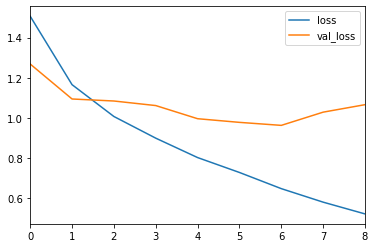

In [40]:
metrics[['loss','val_loss']].plot()

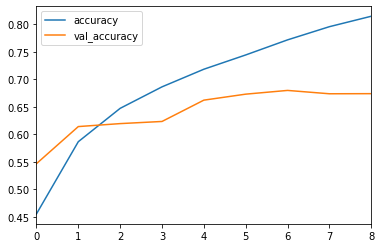

In [43]:
metrics[['accuracy','val_accuracy']].plot()

In [44]:
#We stopped the training based on the loss and not on the accuracy

<b>Compare the same result using evaluate<b>

In [45]:
model.evaluate(X_test,y_cat_test,verbose=0)

[1.0655978028297424, 0.6741]

<b>Do model prediction<b>

In [50]:
predictions = model.predict_classes(X_test)

<b>Evaluation metrics and Reporting<b>

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.80      0.79      0.80      1000
           2       0.52      0.63      0.57      1000
           3       0.48      0.50      0.49      1000
           4       0.63      0.61      0.62      1000
           5       0.53      0.60      0.56      1000
           6       0.77      0.74      0.75      1000
           7       0.77      0.69      0.73      1000
           8       0.81      0.77      0.79      1000
           9       0.84      0.68      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.68     10000
weighted avg       0.69      0.67      0.68     10000



[[726  25  83  21  31   8  10  15  65  16]
 [ 32 793  25   9   6  11  15  10  31  68]
 [ 58   5 630  72  73  70  53  27  10   2]
 [ 17  12 101 500  66 197  58  34   9   6]
 [ 25   3 120  84 611  56  38  54   7   2]
 [ 13   6  82 186  39 59

<b>Visualize confusion matrix<b>

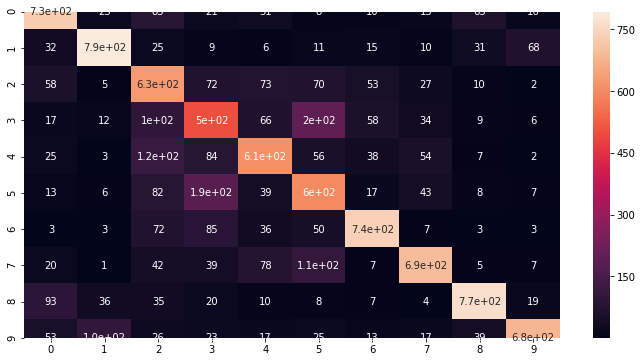

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

<b>Predicting single image<b>

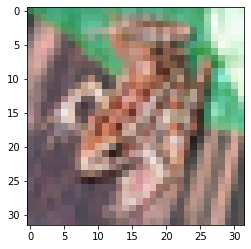

In [56]:
new_img = X_test[95]
plt.imshow(new_img)

In [58]:
y_test[95]

array([6], dtype=uint8)

In [60]:
model.predict_classes(new_img.reshape(1,32,32,3))

array([6], dtype=int64)

<b>So from above, it shows that our model predicted the frog correctly<b>

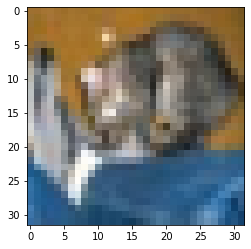

In [61]:
new_img2 = X_test[0]
plt.imshow(new_img2)

In [62]:
y_test[0]

array([3], dtype=uint8)

In [63]:
model.predict_classes(new_img2.reshape(1,32,32,3))

array([3], dtype=int64)

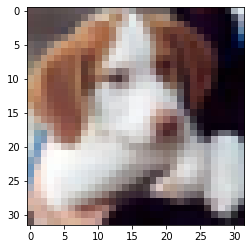

In [65]:
new_img3 = X_test[16]
plt.imshow(new_img3)

In [66]:
y_test[16]

array([5], dtype=uint8)

In [67]:
model.predict_classes(new_img3.reshape(1,32,32,3))

array([5], dtype=int64)